In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

In [6]:
import pandas as pd
import glob
path = r'/Users/balance/Desktop/ARK_10_25' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df1 = pd.concat(li, axis=0, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df1.head(1)

,date,fund,company,ticker,cusip,shares,market value ($),weight (%)
0,10/25/2021,ARKK,TESLA INC,TSLA,88160R101,"2,364,691","$2,151,112,108.88",10.24%


In [9]:
path2 = r'/Users/balance/Desktop/ARK_10_18' # use your path
all_files2 = glob.glob(path2 + "/*.csv")
li2 = []
for filename2 in all_files2:
    df2 = pd.read_csv(filename2, index_col=None, header=0)
    li2.append(df2)
df2 = pd.concat(li2, axis=0, ignore_index=True)

In [10]:
df2.head(1)

,date,fund,company,ticker,cusip,shares,market value ($),weight (%)
0,10/18/2021,ARKK,TESLA INC,TSLA,88160R101,"2,447,494","$2,063,310,866.82",9.99%


In [11]:
df1_1=df1.rename(columns={'market value ($)':'market_value','weight (%)':'weight'})

In [15]:
df2_2=df2.rename(columns={'market value ($)':'market_value','weight (%)':'weight'})

In [16]:
df1_1.dtypes,  df2_2.dtypes

(date            object
 fund            object
 company         object
 ticker          object
 cusip           object
 shares          object
 market_value    object
 weight          object
 dtype: object,
 date            object
 fund            object
 company         object
 ticker          object
 cusip           object
 shares          object
 market_value    object
 weight          object
 dtype: object)

In [17]:
merge1=pd.merge(df1_1,df2_2,on=["fund","cusip"],how="inner")

In [18]:
combined=df1_1.append([df2_2])

In [19]:
merge1.isnull().sum()

date_x             0
fund              64
company_x         64
ticker_x          73
cusip             64
shares_x          64
market_value_x    64
weight_x          64
date_y             0
company_y         64
ticker_y          73
shares_y          64
market_value_y    64
weight_y          64
dtype: int64

In [20]:
for col in merge1.columns:
    pct_missing = np.mean(merge1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date_x - 0%
fund - 15%
company_x - 15%
ticker_x - 17%
cusip - 15%
shares_x - 15%
market_value_x - 15%
weight_x - 15%
date_y - 0%
company_y - 15%
ticker_y - 17%
shares_y - 15%
market_value_y - 15%
weight_y - 15%


In [24]:
### so calculate the share change is "recent share" - "before share" and apply to (pct_change)
merge1[['shares_y','shares_x']] = merge1[['shares_y','shares_x']].pct_change(axis='columns',periods = 1)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
## need to change datatype

In [26]:
## need to remove the symble first

In [27]:
df1_1=df1_1.replace(r'[$%,]','',regex=True)

In [28]:
df2_2=df2_2.replace(r'[$%,]','',regex=True)

In [30]:
df1_1.head(1)

,date,fund,company,ticker,cusip,shares,market_value,weight
0,10/25/2021,ARKK,TESLA INC,TSLA,88160R101,2364691,2151112108.88,10.24


In [31]:
df1_1['market_value']=df1_1['market_value'].astype(float)
df1_1['shares']=df1_1['shares'].astype(float)
df1_1['weight']=df1_1['weight'].astype(float)

In [32]:
df2_2['market_value']=df2_2['market_value'].astype(float)
df2_2['shares']=df2_2['shares'].astype(float)
df2_2['weight']=df2_2['weight'].astype(float)

In [34]:
import datacompy

In [35]:
compare=datacompy.Compare(df1_1,df2_2, join_columns='cusip')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        8   374
1       df2        8   395

Column Summary
--------------

Number of columns in common: 8
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: cusip
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 342
Number of rows in df1 but not in df2: 32
Number of rows in df2 but not in df1: 53

Number of rows with some compared columns unequal: 334
Number of rows with all compared columns equal: 8

Column Comparison
-----------------

Number of columns compared with some values unequal: 5
Number of columns compared with all values equal: 3
Total number of values which compare unequal: 1,313

Columns with Unequal Values or Types
------------------------------------

         Column df1 dtype df2 dtype  # Unequal      Max Diff  # Null Diff
4

In [36]:
merge2=pd.merge(df1_1,df2_2,on=["fund","cusip"],how="inner")

In [37]:
merge2[['shares_y','shares_x']] = merge2[['shares_y','shares_x']].pct_change(axis='columns',periods = 1)

In [44]:
merge2.sort_values('shares_x',ascending=False)P[:20]

SyntaxError: invalid syntax (<ipython-input-44-5ce2db3fa08a>, line 1)

In [39]:
merge2['precentage_change']=merge2['shares_x']

In [45]:
merge2.sort_values('weight_x',ascending=False)[:20]

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y,precentage_change
349,10/25/2021,ARKQ,TESLA INC,TSLA,88160R101,-0.026322,3.036230e+08,11.82,10/18/2021,TESLA INC,TSLA,NaN,2.889839e+08,11.33,-0.026322
0,10/25/2021,ARKK,TESLA INC,TSLA,88160R101,-0.033832,2.151112e+09,10.24,10/18/2021,TESLA INC,TSLA,NaN,2.063311e+09,9.99,-0.033832
109,10/25/2021,ARKF,SQUARE INC - A,SQ,852234103,0.005499,3.479066e+08,10.23,10/18/2021,SQUARE INC - A,SQ,NaN,3.404530e+08,10.09,0.005499
387,10/25/2021,ARKW,TESLA INC,TSLA,88160R101,-0.069507,5.328796e+08,9.86,10/18/2021,TESLA INC,TSLA,NaN,5.307262e+08,9.98,-0.069507
202,10/25/2021,ARKX,TRIMBLE INC,TRMB,896239100,-0.003671,5.206195e+07,9.49,10/18/2021,TRIMBLE INC,TRMB,NaN,5.094025e+07,9.39,-0.003671
201,10/25/2021,ARKX,TRIMBLE INC,TRMB,896239100,-0.003671,5.206195e+07,9.49,10/18/2021,TRIMBLE INC,TRMB,NaN,5.094025e+07,9.39,-0.003671
148,10/25/2021,ARKG,TELADOC HEALTH INC,TDOC,87918A105,0.019587,5.785470e+08,8.02,10/18/2021,TELADOC HEALTH INC,TDOC,NaN,5.575906e+08,7.88,0.019587
203,10/25/2021,ARKX,THE 3D PRINTING ETF,PRNT,00214Q500,-0.003672,4.293383e+07,7.83,10/18/2021,THE 3D PRINTING ETF,PRNT,NaN,4.217421e+07,7.77,-0.003672
204,10/25/2021,ARKX,THE 3D PRINTING ETF,PRNT,00214Q500,-0.003672,4.293383e+07,7.83,10/18/2021,THE 3D PRINTING ETF,PRNT,NaN,4.217421e+07,7.77,-0.003672
110,10/25/2021,ARKF,COINBASE GLOBAL INC -CLASS A,COIN,19260Q107,0.005500,2.506124e+08,7.37,10/18/2021,COINBASE GLOBAL INC -CLASS A,COIN,NaN,2.324812e+08,6.89,0.005500


In [42]:
merge2.query('ticker_x=="PLTR"')

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y,precentage_change
14,10/25/2021,ARKK,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,0.000000,5.876061e+08,2.80,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,577263432.0,2.80,0.000000
141,10/25/2021,ARKF,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,0.005501,4.225980e+07,1.24,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,41288832.0,1.22,0.005501
189,10/25/2021,ARKG,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,0.019590,3.994205e+07,0.55,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,38485104.0,0.54,0.019590
253,10/25/2021,ARKX,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,-0.003675,6.809105e+06,1.24,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,6713928.0,1.24,-0.003675
254,10/25/2021,ARKX,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,-0.003675,6.809105e+06,1.24,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,6713928.0,1.24,-0.003675
381,10/25/2021,ARKQ,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,-0.004754,2.556973e+07,1.00,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,25239672.0,0.99,-0.004754
401,10/25/2021,ARKW,PALANTIR TECHNOLOGIES INC-A,PLTR,69608A108,-0.007033,1.277414e+08,2.36,10/18/2021,PALANTIR TECHNOLOGIES INC-A,PLTR,NaN,126381816.0,2.38,-0.007033


In [48]:
combined2=df1_1.append([df2_2])

<AxesSubplot:xlabel='ticker', ylabel='shares'>

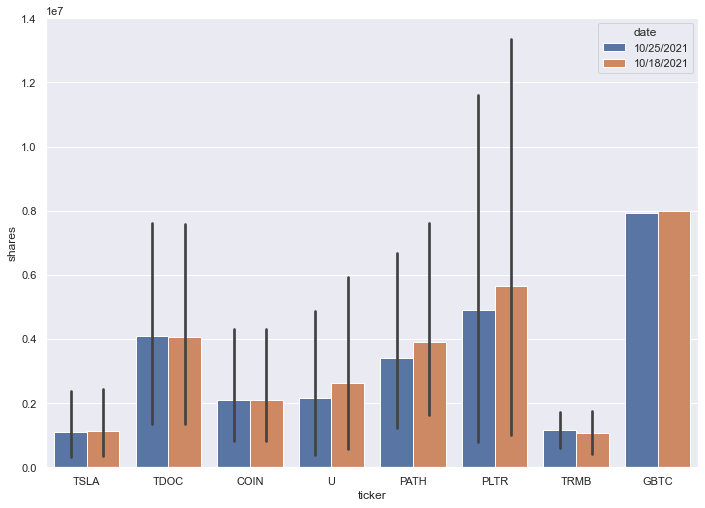

In [51]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(x="ticker",y="shares", hue='date',data=combined2.loc[combined['ticker'].isin(['PLTR','TSLA','U','PATH','COIN','TDOC','SPCE','TRMB','GBTC'])])

In [ ]:
## FIND THE POSITIVE BUY STOCK HAS MORE THAN 2% WEIGHT

In [54]:
merge1_7=merge2.query('weight_x > 2').sort_values(by='weight_x',axis=0,ascending=False,inplace=False)

In [55]:
merge1_7.query('precentage_change > 0').sort_values(by='precentage_change',axis=0,ascending=False,inplace=False)

,date_x,fund,company_x,ticker_x,cusip,shares_x,market_value_x,weight_x,date_y,company_y,ticker_y,shares_y,market_value_y,weight_y,precentage_change
226,10/25/2021,ARKX,BLADE AIR MOBILITY INC,BLDE,092667104,0.049244,1.647700e+07,3.00,10/18/2021,BLADE AIR MOBILITY INC,BLDE,NaN,1.669635e+07,3.08,0.049244
225,10/25/2021,ARKX,BLADE AIR MOBILITY INC,BLDE,092667104,0.049244,1.647700e+07,3.00,10/18/2021,BLADE AIR MOBILITY INC,BLDE,NaN,1.669635e+07,3.08,0.049244
17,10/25/2021,ARKK,TWITTER INC,TWTR,90184L102,0.044875,5.220868e+08,2.48,10/18/2021,TWITTER INC,TWTR,NaN,5.039190e+08,2.44,0.044875
150,10/25/2021,ARKG,PACIFIC BIOSCIENCES OF CALIF,PACB,69404D108,0.040039,3.695564e+08,5.12,10/18/2021,PACIFIC BIOSCIENCES OF CALIF,PACB,NaN,3.402625e+08,4.81,0.040039
156,10/25/2021,ARKG,INTELLIA THERAPEUTICS INC,NTLA,45826J105,0.029695,2.210201e+08,3.06,10/18/2021,INTELLIA THERAPEUTICS INC,NTLA,NaN,2.129490e+08,3.01,0.029695
159,10/25/2021,ARKG,CRISPR THERAPEUTICS AG,CRSP,H17182108,0.019593,2.115981e+08,2.93,10/18/2021,CRISPR THERAPEUTICS AG,CRSP,NaN,2.106594e+08,2.98,0.019593
165,10/25/2021,ARKG,INVITAE CORP,NVTA,46185L103,0.019590,1.694617e+08,2.35,10/18/2021,INVITAE CORP,NVTA,NaN,1.632960e+08,2.31,0.019590
169,10/25/2021,ARKG,IOVANCE BIOTHERAPEUTICS INC,IOVA,462260100,0.019590,1.484417e+08,2.06,10/18/2021,IOVANCE BIOTHERAPEUTICS INC,IOVA,NaN,1.512744e+08,2.14,0.019590
155,10/25/2021,ARKG,CAREDX INC,CDNA,14167L103,0.019590,2.544343e+08,3.53,10/18/2021,CAREDX INC,CDNA,NaN,2.458067e+08,3.47,0.019590
161,10/25/2021,ARKG,INCYTE CORP,INCY,45337C102,0.019589,1.896663e+08,2.63,10/18/2021,INCYTE CORP,INCY,NaN,1.853719e+08,2.62,0.019589


In [ ]:
## THE PURCHASE PRECENTAGE IS SMALL, NOT A SIGNIFICANT IMPACT